In [29]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# read in data
raw_data = pd.read_csv('homework2_data_code/food-consumption.csv')

# filter sweden, finland, and spain (they are only rows with nan's)
raw_data = raw_data.dropna()

# separate countries from numeric features

countries = raw_data.Country.values

numeric_features = raw_data.iloc[:, 1:]

countries

array(['Germany', 'Italy', 'France', 'Holland', 'Belgium', 'Luxembourg',
       'England', 'Portugal', 'Austria', 'Switzerland', 'Denmark',
       'Norway', 'Ireland'], dtype=object)

In [23]:
### Implement PCA

num_components = 2

# get data mean
mu = np.mean(numeric_features, axis=0)

# get covariance matrix
cov_mat = np.cov(numeric_features, rowvar=False)

# get eigenvals and eigenvecs
eigenvals, eigenvecs = np.linalg.eig(cov_mat)

# sort them
idx = eigenvals.argsort()[::-1]  
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]

# P = vectors.T.dot(C.T)

# center data
centered_mat = (numeric_features - mu).values

# project to principle components
pc = np.dot(eigenvecs[:, :num_components].T, centered_mat.T)

pc


array([[ 20.50326296+0.j, -82.04597382+0.j, -27.3214714 +0.j,
         64.62461193+0.j,  -7.34263383+0.j,  -6.76560844+0.j,
         99.46008035+0.j, -96.64496923+0.j, -43.56127803+0.j,
         -7.00761873+0.j,  34.74637889+0.j,  10.66441508+0.j,
         40.69080426+0.j],
       [ 10.45128938+0.j,  -7.69305905+0.j,  41.011802  +0.j,
          5.15620008+0.j,  10.88994973+0.j,  88.66530766+0.j,
          3.99798888+0.j, -14.42019835+0.j, -51.76204732+0.j,
         23.97357226+0.j, -16.75586317+0.j, -37.66525252+0.j,
        -55.84968957+0.j]])

/Users/nickchao/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/nickchao/anaconda/lib/python3.6/site-packages/matplotlib/text.py:1770: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/nickchao/anaconda/lib/python3.6/site-packages/matplotlib/text.py:1772: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/Users/nickchao/anaconda/lib/python3.6/site-packages/matplotlib/text.py:891: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/Users/nickchao/anaconda/lib/python3.6/site-packages/matplotlib/text.py:892: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Users/nickchao/a

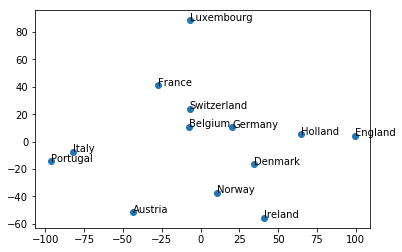

In [36]:
### plot
# y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
# z = [0.15, 0.3, 0.45, 0.6, 0.75]
# n = [58, 651, 393, 203, 123]

# fig, ax = plt.subplots()
# ax.scatter(z, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

fig, ax = plt.subplots()
ax.scatter(pc[0, :], pc[1, :])

for i, country in enumerate(countries):
    ax.annotate(country, (pc[0, i], pc[1, i]))
